## Task 3: Conduct an Exploratory Data Analysis (EDA) on your dataset
As a rough guideline, each EDA should:

- Involve at least two columns/features of your dataset

- At least three useful visualizations created by you (the more the merrier (within reason)!)

- Some notes and commentary to help others see observations you find interesting.

### Research Question:
What is the average increase in cost smokers pay as compared to their non-smoking counterpoint?

In [1]:
#Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
import statistics as stat

In [2]:
#Load wrangled data
from scriptz import project_functions as pf
df = pf.wranglemania2K21("../../data/raw/insurance.csv")
df

,age,sex,bmi,smoker,charges
0,19,female,27.900,yes,16884.92400
1,18,male,33.770,no,1725.55230
2,28,male,33.000,no,4449.46200
3,33,male,22.705,no,21984.47061
4,32,male,28.880,no,3866.85520
...,...,...,...,...,...
1313,50,male,30.970,no,10600.54830
1314,18,female,31.920,no,2205.98080
1315,18,female,36.850,no,1629.83350
1316,21,female,25.800,no,2007.94500


### EDA 1: Does smoking directly affest one's BMI?

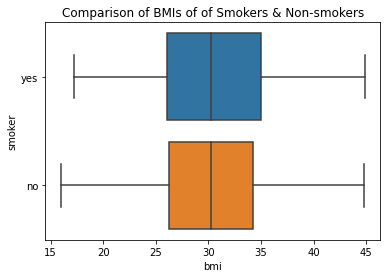

In [8]:
#Shows the distribution of BMI amongst smokers and non-smokers
sns.boxplot(x='bmi', y='smoker', data=df)
plt.title("Comparison of BMIs of of Smokers & Non-smokers")
plt.show()

It would appear that smoker's may have a slightly higher BMI, but this isn't significant enought to confirm.
For our purposes, we'll assuume that smoking does not affect one's BMI.

### EDA 2: Do smokers have higher medical costs?

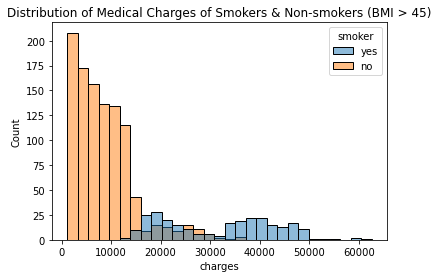

In [9]:
#Shows the distribution of medical charges between smokers and non-smokers
sns.histplot(data=df, x="charges", hue ="smoker")
plt.title("Distribution of Medical Charges of Smokers & Non-smokers (BMI > 45)")
plt.show()

It is clear that non-smokers have medical charges predominantly below 10000 dollars.
On the other hand, a smoker's medical charges begin at around 10000 dollars and only increase.
It's fair to say that there is a direct correlation between smoking and medical charges.

### EDA 3: What does the average smoker and non-smoker pay in medical charges?

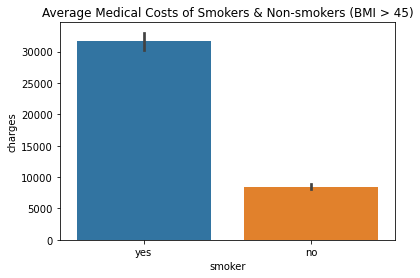

In [10]:
#Displays average medical charges for smokers and non-smokers
sns.barplot(x='smoker',y='charges',data=df, estimator=np.average)
plt.title("Average Medical Costs of Smokers & Non-smokers (BMI > 45)")
plt.show()

This further cofirms our results from EDA 2. It's obvious that the avearge medical charges
for a smoker are about 20000 dollars higher than that of a non-smoker.

#### EDA 3.1: Further analysis on medical charges between smokers and non-smokers.

In [6]:
#Calculating the exact average medical cost between smokers and non-smokers
df_smoker = df[df["smoker"]== "yes"]
df_smoker = int(np.mean(df_smoker['charges']))

df_non_smoker = df[df["smoker"]== "no"]
df_non_smoker = int(np.mean(df_non_smoker['charges']))

difference = df_smoker - df_non_smoker

print(f"Smokers have average medical charges of {df_smoker} dollars.")
print(f"Non-smokers have average medical charges of {df_non_smoker} dollars.")
print(f"Smokers pay {difference} dollars more on average in medical charges than non-smokers.")

Smokers have average medical charges of 31744 dollars.
Non-smokers have average medical charges of 8451 dollars.
Smokers pay 23293 dollars more on average in medical charges than non-smokers.
